In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import json
import ntpath
import mixamo_helper as mm_helper
from mixamo_helper import Mixamo
from IPython.display import clear_output
import copy
import glm
import pyglm_helper as glmh

In [2]:
json_object = None
file_name = 'output/mixamo_T_pose.gif.json_mixamo.json' 
with open(file_name) as f:
    json_object = json.load(f)

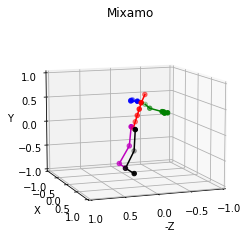

In [3]:
current_frame = 0
mm_helper.draw_mixamo(json_object, current_frame, 70)
current_keypoints = json_object["frames"][current_frame]["keypoints3D"]

In [4]:
glm_list, visibility_list, parent_list = mm_helper.frame_json_to_glm_vec_list(json_object, current_frame)


In [5]:
def find_hips(pixel3d_json):
    if pixel3d_json["name"] == 'Hips':
        return [True, pixel3d_json]
    else:
        for child in pixel3d_json["child"]:
            is_find, result = find_hips(child)
            if is_find:
                return [is_find, result]
        return [False, None]

In [6]:
pix3d_json_object = None
file_name = 'pixel3d_json/amy_model.json' 
with open(file_name) as f:
    pix3d_json_object = json.load(f)
is_find, result =  find_hips(pix3d_json_object["node"])

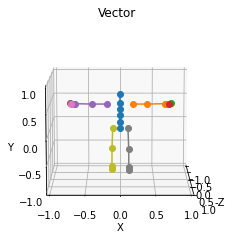

In [7]:
root_node1 = glmh.ModelNode()
root_node1.set_mixamo(result, mm_helper.get_mixamo_name_idx_map())
root_node1.normalize(glm_list, mm_helper.get_mixamo_name_idx_map())
rv = []
rg = []
root_node1.get_vec_and_group_list(rv, rg, is_apply_tmp_transform= False)
glmh.draw_list([v for v in rv ], rg, range= 1.0, azim= 00)

In [8]:
_, hips_n = root_node1.find_node(Mixamo.Hips.name)
_, lul_n = root_node1.find_node(Mixamo.LeftUpLeg.name)
_, rul_n = root_node1.find_node(Mixamo.RightUpLeg.name)
_, spine_n = root_node1.find_node(Mixamo.Spine.name)

_, spine2_n = root_node1.find_node(Mixamo.Spine2.name)
_, neck_n = root_node1.find_node(Mixamo.Neck.name)
_, la_n = root_node1.find_node(Mixamo.LeftArm.name)
_, ra_n = root_node1.find_node(Mixamo.RightArm.name)

_, ll_n = root_node1.find_node(Mixamo.LeftLeg.name)
_, lf_n = root_node1.find_node(Mixamo.LeftFoot.name)
_, ltb_n = root_node1.find_node(Mixamo.LeftToeBase.name)


# ARM

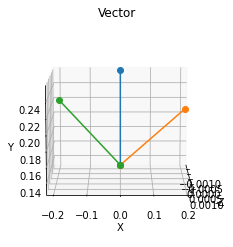

vec3(            0,     0.258034,   0.00120038 )
vec3(            0,     0.129014,   0.00120038 )


In [9]:
v_spine2 = spine2_n.get_gizmo().get_origin()
v_neck = neck_n.get_gizmo(spine2_n.get_transform()).get_origin()
v_la = la_n.get_gizmo(spine2_n.get_transform()).get_origin()
v_ra = ra_n.get_gizmo(spine2_n.get_transform()).get_origin()

glmh.draw_list([v_spine2, v_neck, v_la, v_ra], [[0, 1],[0,2], [0,3]], azim = 0, range = -1.0)
print(v_neck)
print(v_spine2)

# left leg

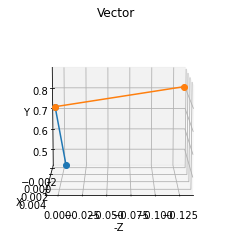

In [10]:
v_ll = ll_n.get_gizmo().get_origin()
v_lf = lf_n.get_gizmo(ll_n.get_transform()).get_origin()
v_ltb = ltb_n.get_gizmo(ll_n.get_transform() * lf_n.get_transform()).get_origin()

glmh.draw_list([v_ll, v_lf, v_ltb], [[0,1],[1,2]], azim = 90, range = -0.7)

# HIPS

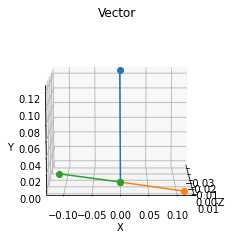

In [11]:
hip_v = glm_list[Mixamo.Hips]
spine_v = glm_list[Mixamo.Spine]
leftleg_v = glm_list[Mixamo.LeftUpLeg]
rightleg_v = glm_list[Mixamo.RightUpLeg]

glmh.draw_list([hip_v, spine_v,leftleg_v, rightleg_v], [[0, 1],[0, 2], [0,3]], azim = 0, range = -1.0)

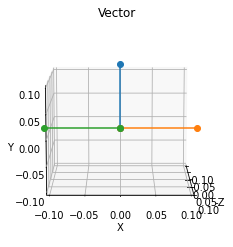

In [12]:
v_hips = hips_n.get_gizmo().get_origin()
v_lul = lul_n.get_gizmo().get_origin()
v_rul = rul_n.get_gizmo().get_origin()
v_spine = spine_n.get_gizmo().get_origin()

glmh.draw_list([v_hips, v_spine, v_lul, v_rul], [[0, 1],[0,2], [0,3]], azim = 0, range = 0.1)


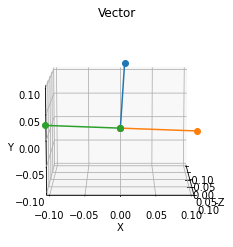

In [13]:
transform = glmh.calc_hip_transform(glm_list, hips_n, lul_n, spine_n)
draw_list = [v_hips, v_spine, v_lul, v_rul]
glmh.draw_list([transform*v for v in draw_list], [[0, 1],[0,2], [0,3]], azim = 0, range = 0.1)

In [14]:
root_node1.calc_animation(glm_list, mm_helper.get_mixamo_name_idx_map() )

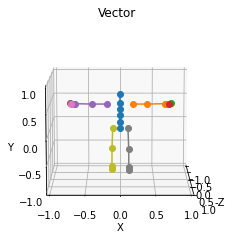

In [17]:
rv = []
rg = []
root_node1.get_vec_and_group_list(rv, rg, is_apply_tmp_transform= False)
glmh.draw_list([v for v in rv ], rg, range= 1.0, azim= 0)
# glmh.glm_list_to_gif(rv, rg, save_path="./screenshot/", range=1.0)